In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from fastdtw import fastdtw
%matplotlib inline

In [2]:
def dateconverter(value): 
    s= str(value)
    Date=datetime.strptime(value, '%m/%d/%y')
    return Date

In [3]:
def get_countydict(df):
    Counties={}
    for value in df.County.unique():
        Counties[value]=df.loc[df['County'] == value]
    return Counties

This section is EDA and cleaning of all drought severity data dealing with California.

In [4]:
CA_SEV_DATA1=pd.read_csv('datasets/California_Drought_Severity_By_County_1997-2002.csv')
CA_SEV_DATA2=pd.read_csv('datasets/California_Drought_Severity_By_County_2002-2007.csv')
CA_SEV_DATA3=pd.read_csv('datasets/California_Drought_Severity_By_County_2007-2012.csv')
CA_SEV_DATA4=pd.read_csv('datasets/California_Drought_Severity_By_County_2012-2017.csv')

In [5]:
California_Severity_Data=pd.concat([CA_SEV_DATA1,CA_SEV_DATA2,CA_SEV_DATA3,CA_SEV_DATA4],axis=0)
California_Severity_Data.shape

(94219, 12)

In [6]:
California_Severity_Data.rename(columns={'Name': 'County'}, inplace=True)

In [7]:
CA_SEV_Dates=pd.DataFrame(California_Severity_Data.ReleaseDate.apply(dateconverter))

In [8]:
California_Severity_Data.ReleaseDate=CA_SEV_Dates.ReleaseDate

In [9]:
CA_years=[]
for value in California_Severity_Data['ReleaseDate']:
    CA_years.append(value.year)

In [10]:
CAyearsdf=pd.DataFrame(data=CA_years)

In [11]:
CAyearsdf.rename(columns={0: 'Years'}, inplace=True)

In [12]:
California_Severity_Data = California_Severity_Data.reset_index(drop=True)

In [13]:
California_Severity_Data['Year']=CAyearsdf['Years']

In [14]:
California_Severity_Data.sort_values(by='ReleaseDate',ascending=True,inplace=True)

In [15]:
California_Severity_Data.drop(['Id','PercentChangeFromWAve',
                             'AreaChangeFromWAve','StatisticFormatID'],axis=1,
                             inplace=True)

In [16]:
California=get_countydict(California_Severity_Data)

In [17]:
CABioregiondict={'Sierra County':'Sierra',
               'Amador County':'Sierra',
               'Placer County':'Sierra',
               'Alpine County':'Sierra',
               'Santa Clara County':'Bay/Delta',
               'Yolo County':'Sacramento Valley',
               'Mono County':'Sierra',
               'Ventura County':'Central Coast',
               'Modoc County':'Modoc',
               'Napa County':'Bay/Delta',
               'San Luis Obispo County':'Central Coast',
               'Los Angeles County':'South Coast',
               'Contra Costa County':'Bay/Delta',
               'Yuba County':'Sacramento Valley',
               'Solano County':'Bay/Delta', 
               'Del Norte County':'Klamath/North Coast',
               'Riverside County':'Mojave',
               'Monterey County':'Central Coast',
               'Plumas County':'Sierra',
               'San Francisco County':'Bay/Delta',
               'Mariposa County':'Sierra',
               'Shasta County':'Sacramento Valley',
               'Santa Cruz County':'Central Coast',
               'Tehama County':'Sacramento Valley',
               'Imperial County':'Colorado Desert',
               'Siskiyou County':'Klamath/North Coast',
               'El Dorado County':'Sierra',
               'Mendocino County':'Klamath/North Coast',
               'Fresno County':'San Joaquin Valley',
               'San Bernardino County':'Mojave',
               'San Joaquin County':'San Joaquin Valley',
               'Tulare County':'San Joaquin Valley',
               'Alameda County':'Bay/Delta',
               'Kings County':'San Joaquin Valley',
               'Butte County':'Sacramento Valley',
               'Merced County':'San Joaquin Valley',
               'Sacramento County':'Sacramento Valley',
               'Tuolumne County':'Sierra',
               'Sonoma County':'Bay/Delta',
               'Santa Barbara County':'Central Coast',
               'Madera County':'San Joaquin Valley',
               'Lassen County':'Modoc',
               'Glenn County':'Sacramento Valley',
               'Sutter County':'Sacramento Valley',
               'San Diego County':'South Coast',
               'Lake County':'Klamath/North Coast',
               'Nevada County':'Sierra',
               'Trinity County':'Klamath/North Coast',
               'Inyo County':'Sierra',
               'San Mateo County':'Bay/Delta',
               'Orange County':'South Coast',
               'Humboldt County':'Klamath/North Coast',
               'Colusa County':'Sacramento Valley',
               'Calaveras County':'Sierra',
               'Kern County':'San Joaquin Valley',
               'San Benito County':'Central Coast',
               'Marin County':'Bay/Delta',
               'Stanislaus County':'San Joaquin Valley'
              }
for key, value in CABioregiondict.items():
    California[key]['Bioregion']=value

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


This section is EDA and cleaning of all drought severity data dealing with Nebraska.

In [18]:
NE_SEV_DATA1=pd.read_csv('datasets/Nebraska_Drought_Severity_By_County_1997-2002.csv')
NE_SEV_DATA2=pd.read_csv('datasets/Nebraska_Drought_Severity_By_County_2002-2007.csv')
NE_SEV_DATA3=pd.read_csv('datasets/Nebraska_Drought_Severity_By_County_2007-2012.csv')
NE_SEV_DATA4=pd.read_csv('datasets/Nebraska_Drought_Severity_By_County_2012-2017.csv')

In [19]:
Nebraska_Severity_Data=pd.concat([NE_SEV_DATA1,NE_SEV_DATA2,NE_SEV_DATA3,NE_SEV_DATA4],axis=0)
Nebraska_Severity_Data.shape

(117659, 12)

In [20]:
Nebraska_Severity_Data.rename(columns={'Name': 'County'}, inplace=True)

In [21]:
NE_SEV_Dates=pd.DataFrame(Nebraska_Severity_Data.ReleaseDate.apply(dateconverter))

In [22]:
Nebraska_Severity_Data.ReleaseDate=NE_SEV_Dates.ReleaseDate

In [23]:
NE_years=[]
for value in Nebraska_Severity_Data['ReleaseDate']:
   NE_years.append(value.year)

In [24]:
NEyearsdf=pd.DataFrame(data=NE_years)

In [25]:
NEyearsdf.rename(columns={0: 'Years'}, inplace=True)

In [26]:
Nebraska_Severity_Data = Nebraska_Severity_Data.reset_index(drop=True)

In [27]:
Nebraska_Severity_Data['Year']=NEyearsdf['Years']

In [28]:
Nebraska_Severity_Data.sort_values(by='ReleaseDate',ascending=True,inplace=True)

In [29]:
Nebraska_Severity_Data.drop(['Id','PercentChangeFromWAve',
                             'AreaChangeFromWAve','StatisticFormatID'],axis=1,
                             inplace=True)

In [30]:
Nebraska=get_countydict(Nebraska_Severity_Data)

In [31]:
NEBioregiondict={'York County':'Tallgrass Prairie',
                 'Cheyenne County':'Shortgrass Prairie',
                 'Rock County':'Sandhills',
                 'Clay County':'Tallgrass Prairie',
                 'Richardson County':'Tallgrass Prairie',
                 'Colfax County':'Tallgrass Prairie',
                 'Red Willow County':'Mixedgrass Prairie',
                 'Cuming County':'Tallgrass Prairie',
                 'Polk County':'Tallgrass Prairie',
                 'Custer County':'Mixedgrass Prairie',
                 'Platte County':'Tallgrass Prairie',
                 'Dakota County':'Tallgrass Prairie',
                 'Pierce County':'Tallgrass Prairie',
                 'Dawes County':'Shortgrass Prairie',
                 'Phelps County':'Mixedgrass Prairie',
                 'Perkins County':'Shortgrass Prairie',
                 'Deuel County':'Shortgrass Prairie',
                 'Pawnee County':'Tallgrass Prairie',
                 'Dixon County':'Tallgrass Prairie',
                 'Otoe County':'Tallgrass Prairie',
                 'Dodge County':'Tallgrass Prairie',
                 'Nuckolls County':'Mixedgrass Prairie',
                 'Douglas County':'Tallgrass Prairie',
                 'Nemaha County':'Tallgrass Prairie',
                 'Dundy County':'Shortgrass Prairie',
                 'Wheeler County':'Sandhills',
                 'Nance County':'Tallgrass Prairie',
                 'Fillmore County':'Tallgrass Prairie',
                 'Saline County':'Tallgrass Prairie',
                 'Morrill County':'Shortgrass Prairie',
                 'Cherry County':'Sandhills',
                 'Chase County':'Shortgrass Prairie',
                 'Antelope County':'Tallgrass Prairie',
                 'Wayne County':'Tallgrass Prairie',
                 'Arthur County':'Sandhills',
                 'Washington County':'Tallgrass Prairie',
                 'Banner County':'Shortgrass Prairie',
                 'Valley County':'Mixedgrass Prairie',
                 'Blaine County':'Sandhills',
                 'Thurston County':'Tallgrass Prairie',
                 'Boone County':'Tallgrass Prairie',
                 'Thomas County':'Sandhills',
                 'Box Butte County':'Shortgrass Prairie',
                 'Thayer County':'Tallgrass Prairie',
                 'Boyd County':'Mixedgrass Prairie',
                 'Stanton County':'Tallgrass Prairie',
                 'Brown County':'Sandhills',
                 'Sioux County':'Shortgrass Prairie',
                 'Buffalo County':'Mixedgrass Prairie',
                 'Sherman County':'Mixedgrass Prairie',
                 'Burt County':'Tallgrass Prairie',
                 'Sheridan County':'Sandhills',
                 'Butler County':'Tallgrass Prairie', 
                 'Adams County':'Mixedgrass Prairie', 
                 'Seward County':'Tallgrass Prairie',
                 'Cass County':'Tallgrass Prairie', 
                 'Scotts Bluff County':'Shortgrass Prairie',
                 'Cedar County':'Tallgrass Prairie',
                 'Saunders County':'Tallgrass Prairie',
                 'Sarpy County':'Tallgrass Prairie', 
                 'Franklin County':'Mixedgrass Prairie',
                 'Dawson County':'Mixedgrass Prairie',
                 'Merrick County':'Mixedgrass Prairie',
                 'Garfield County':'Sandhills',
                 'Lincoln County':'Sandhills',
                 'Gosper County':'Mixedgrass Prairie',
                 'Lancaster County':'Tallgrass Prairie',
                 'Grant County':'Sandhills',
                 'Knox County':'Tallgrass Prairie',
                 'Greeley County':'Mixedgrass Prairie',
                 'Kimball County':'Shortgrass Prairie',
                 'Hall County':'Mixedgrass Prairie',
                 'Keya Paha County':'Mixedgrass Prairie',
                 'Hamilton County':'Tallgrass Prairie', 
                 'Keith County':'Shortgrass Prairie', 
                 'Harlan County':'Mixedgrass Prairie',
                 'Kearney County':'Mixedgrass Prairie',
                 'Hayes County':'Mixedgrass Prairie', 
                 'Johnson County':'Tallgrass Prairie',
                 'Hitchcock County':'Mixedgrass Prairie',
                 'Jefferson County':'Tallgrass Prairie',
                 'Holt County':'Sandhills',
                 'Howard County':'Mixedgrass Prairie',
                 'Hooker County':'Sandhills',
                 'Logan County':'Sandhills',
                 'Garden County':'Sandhills',
                 'Webster County':'Mixedgrass Prairie',
                 'Madison County':'Tallgrass Prairie',
                 'Furnas County':'Mixedgrass Prairie', 
                 'Loup County':'Sandhills',
                 'McPherson County':'Sandhills',
                 'Gage County':'Tallgrass Prairie',
                 'Frontier County':'Mixedgrass Prairie'
                }


for key, value in NEBioregiondict.items():
    Nebraska[key]['Bioregion']=value

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
California_Severity_Data.USDMLevel.value_counts()

D0      34263
D1      26680
D2      18481
D3       9321
D4       5474
Name: USDMLevel, dtype: int64

In [33]:
California_Severity_Data.shape

(94219, 9)

In [34]:
34263/94219*100

36.36527664271538

In [35]:
26680/94219*100

28.317006124030186

In [36]:
18481/94219*100

19.614939661851643

In [37]:
9321/94219*100

9.89290907354143

In [38]:
5474/94219*100

5.809868497861365

In [39]:
Nebraska_Severity_Data.USDMLevel.value_counts()

D0      51665
D1      32718
D2      20142
D3       9985
D4       3149
Name: USDMLevel, dtype: int64

In [40]:
Nebraska_Severity_Data.shape

(117659, 9)

In [41]:
51665/117659*100

43.910793054504964

In [42]:
32718/117659*100

27.807477541029584

In [43]:
20142/117659*100

17.11896242531383

In [44]:
9985/117659*100

8.486388631553897

In [45]:
3149/117659*100

2.6763783475977188

In [46]:
List_of_CA_Averages=[]
for keys in California:
    List_of_CA_Averages.append(California[keys].USDMLevelID.mean())

In [47]:
CA_Avg_List=pd.DataFrame(List_of_CA_Averages)

In [48]:
CA_Avg_List.rename(columns={0: 'Average'}, inplace=True)

In [49]:
CA_Avg_List.Average.mean()

2.1886447669741123

In [50]:
List_of_NE_Averages=[]
for keys in Nebraska:
    List_of_NE_Averages.append(Nebraska[keys].USDMLevelID.mean())

In [51]:
NE_Avg_List=pd.DataFrame(List_of_NE_Averages)

In [52]:
NE_Avg_List.rename(columns={0: 'Average'}, inplace=True)

In [53]:
CA_Bio=pd.DataFrame.from_dict(CABioregiondict,orient='index')

In [54]:
CA_Bio.rename(columns={0: 'Type'}, inplace=True)

In [55]:
CA_Bio.index

Index(['Sierra County', 'Amador County', 'Placer County', 'Alpine County',
       'Santa Clara County', 'Yolo County', 'Mono County', 'Ventura County',
       'Modoc County', 'Napa County', 'San Luis Obispo County',
       'Los Angeles County', 'Contra Costa County', 'Yuba County',
       'Solano County', 'Del Norte County', 'Riverside County',
       'Monterey County', 'Plumas County', 'San Francisco County',
       'Mariposa County', 'Shasta County', 'Santa Cruz County',
       'Tehama County', 'Imperial County', 'Siskiyou County',
       'El Dorado County', 'Mendocino County', 'Fresno County',
       'San Bernardino County', 'San Joaquin County', 'Tulare County',
       'Alameda County', 'Kings County', 'Butte County', 'Merced County',
       'Sacramento County', 'Tuolumne County', 'Sonoma County',
       'Santa Barbara County', 'Madera County', 'Lassen County',
       'Glenn County', 'Sutter County', 'San Diego County', 'Lake County',
       'Nevada County', 'Trinity County', 'Inyo

In [56]:
NE_Bio=pd.DataFrame.from_dict(NEBioregiondict,orient='index')

In [57]:
NE_Bio.rename(columns={0: 'Type'}, inplace=True)

In [58]:
NE_Bio.Type.value_counts()

Tallgrass Prairie     39
Mixedgrass Prairie    24
Sandhills             17
Shortgrass Prairie    13
Name: Type, dtype: int64

In [59]:
CA_Bio.Type.value_counts()

Sierra                 12
Bay/Delta               9
Sacramento Valley       9
San Joaquin Valley      8
Central Coast           6
Klamath/North Coast     6
South Coast             3
Mojave                  2
Modoc                   2
Colorado Desert         1
Name: Type, dtype: int64

In [60]:
CA_Bio['County']=CA_Bio.index

In [61]:
CA_Bio[CA_Bio.Type=='Bay/Delta']

,Type,County
Santa Clara County,Bay/Delta,Santa Clara County
Napa County,Bay/Delta,Napa County
Contra Costa County,Bay/Delta,Contra Costa County
Solano County,Bay/Delta,Solano County
San Francisco County,Bay/Delta,San Francisco County
Alameda County,Bay/Delta,Alameda County
Sonoma County,Bay/Delta,Sonoma County
San Mateo County,Bay/Delta,San Mateo County
Marin County,Bay/Delta,Marin County


In [62]:
California['Nevada County'].USDMLevelID.value_counts()

1    648
2    524
3    345
4    156
5     88
Name: USDMLevelID, dtype: int64

In [63]:
California['San Bernardino County'].USDMLevelID.value_counts()

1    774
2    646
3    536
4    277
5    130
Name: USDMLevelID, dtype: int64

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


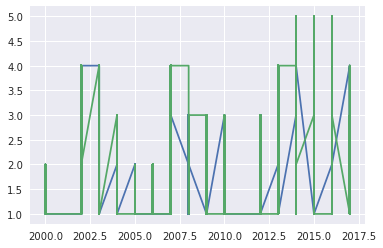

In [64]:
#Make this into a function to use for all the bioregions!
Mojave_List=[]
for key in California:
    if California[key]['Bioregion'].iloc[0]=='Mojave':
        Mojave_List.append(key)
for item in Mojave_List:
    plt.plot(California[item]['Year'],California[item]['USDMLevelID'])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


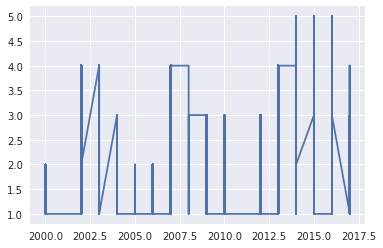

In [65]:
plt.plot(California['San Bernardino County']['Year'],California['San Bernardino County']['USDMLevelID'])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


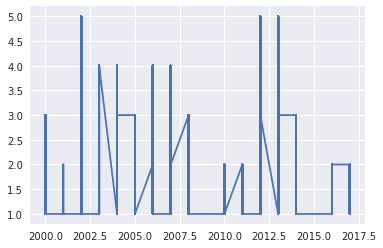

In [66]:
plt.plot(Nebraska['Garden County']['Year'],Nebraska['Garden County']['USDMLevelID'])

In [67]:
#for key in Nebraska:
    #print(Nebraska[key].shape)

In [147]:
CA_agro_counties=['Fresno County',
'Tulare County',
'Monterey County',
'Kern County',
'Merced County',
'Stanislaus County',
'San Joaquin County',
'Ventura County',
'San Diego County',
'Imperial County']
len(CA_agro_counties)

10

In [144]:
DTWvalues={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Fresno County'].USDMLevelID)
    DTWvalues[value]=test_list[0]
    #test_list2=test_list[1:]
   # x = []; y=[]
    #for point in test_list2[0]:
       # x.append(point[0])
        #y.append(point[1])
    #plt.figure()
   # plt.scatter(x,y)

In [145]:
for value in CA_agro_counties:
    print(DTWvalues[value])

150.0
1030.0
1184.0
1195.0
1195.0
1212.0
1254.0
1136.0
1824.0
1944.0


In [146]:
DTWvalues2={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Tulare County'].USDMLevelID)
    DTWvalues2[value]=test_list[0]

In [148]:
DTWvalues3={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Monterey County'].USDMLevelID)
    DTWvalues3[value]=test_list[0]

'Merced County',
'Stanislaus County',
'San Joaquin County',
'Ventura County',
'',
'Imperial County'

In [76]:
#test_list2

In [149]:
DTWvalues4={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Kern County'].USDMLevelID)
    DTWvalues4[value]=test_list[0]

In [150]:
DTWvalues5={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Merced County'].USDMLevelID)
    DTWvalues5[value]=test_list[0]

In [151]:
DTWvalues6={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Stanislaus County'].USDMLevelID)
    DTWvalues6[value]=test_list[0]
    

In [152]:
DTWvalues7={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['San Joaquin County'].USDMLevelID)
    DTWvalues7[value]=test_list[0]

In [153]:
DTWvalues8={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['Ventura County'].USDMLevelID)
    DTWvalues8[value]=test_list[0]

In [154]:
DTWvalues9={}
for value in California.keys():
    test_list=fastdtw(California[value].USDMLevelID,
        California['San Diego County'].USDMLevelID)
    DTWvalues9[value]=test_list[0]

In [83]:
print

In [84]:
test_list3=fastdtw(California['Monterey County'].USDMLevelID,California['Fresno County'].USDMLevelID)

In [158]:
max(DTWvalues, key=DTWvalues.get)

'Imperial County'

In [159]:
max(DTWvalues2, key=DTWvalues2.get)

'San Diego County'

In [160]:
max(DTWvalues3, key=DTWvalues3.get)

'Modoc County'

In [161]:
max(DTWvalues4, key=DTWvalues4.get)

'Modoc County'

In [162]:
max(DTWvalues5, key=DTWvalues5.get)

'Modoc County'

In [163]:
max(DTWvalues6, key=DTWvalues6.get)

'Modoc County'

In [164]:
max(DTWvalues7, key=DTWvalues7.get)

'Modoc County'

In [165]:
max(DTWvalues8, key=DTWvalues8.get)

'Modoc County'

In [166]:
max(DTWvalues9, key=DTWvalues9.get)

'San Luis Obispo County'